# Spatial Patterns of Diseases in Toronto, Ontario
## GGR274 Final Project
Jude Clifford Lobo
PRA0401 



## Introduction
*Does Asthma, Diabetes, High Blood Pressure and Chronic Obstructive Pulmonary Disease (COPD) diseases have similar spatial patterns?*
- The detection of spatial patterns in the transmission of diseases can aid in the efficient planning and designing of critical city infrastructure
- Spatial patterns can aid in the prediction of how a group of diseases will behave overtime

## Data 
- Evaluating spatial clustering of 4 diseases
    - Diabetes 
    - Asthma 
    - High Blood Pressure 
    - Chronic Obstructive Pulmonary Disease 
- Conducting global and local spatial autocorrelation through the utilisation of Moran’s I 
- Focus on adulthood (ages 20 - 64)

### Libraries and Modules

In [1]:
# Installing needed libraries
import sys
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install mapclassify
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install libpysal
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install esda
!{sys.executable} -m pip install splot
!{sys.executable} -m pip install numba==0.53
#!{sys.executable} -m pip install contextily

# Importing needed libraries 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import xlrd
import libpysal as lps
import splot
import esda
#import contextily as cx

pd.set_option("display.max_rows", None, "display.max_columns", None)

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Using cached libpysal-4.6.2-py3-none-any.whl (2.4 MB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Processing /home/jovyan/.cache/pip/wheels/fb/9a/64/a3dd7fe87c3e5d3373b2d1fa37b219f8d323f873eb34c64c02/esda-2.4.1-py3-none-any.whl
  Using cached splot-1.1.5.post1-py3-none-any.whl (39 kB)
  Using cached spreg-1.2.4-py3-none-any.whl (209 kB)
  Using cached giddy-2.3.3-py3-none-any.whl (60 kB)
  Using cached quantecon-0.5.3-py3-none-any.whl (179 kB)
     |████████████████████████████████| 3.4 MB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 61.9 MB/s eta 0:00:01
  Using cached numba-0.53.0-cp38-cp38-manylinux2014_x86_64.whl (3.4 MB)
  Using cached llvmlite-0.36.0-cp38-cp38-manylinux2010_x86_64.whl (25.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.1
    Uninstalling llvmlite-0.38.1:
      Successfully uninstalled llvmlite-0.38.1
  Attempting uninstall: numba


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [2]:
# Load in relevant datasets and set headers
disease_rawCOPD = pd.read_excel("1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls", header = 11, sheet_name = 4)
disease_rawASTHMA = pd.read_excel("1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls", header = 11, sheet_name = 1)
disease_rawDIABETES = pd.read_excel("1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls", header = 12, sheet_name = 0)
disease_rawHBP = pd.read_excel("1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls", header = 11, sheet_name = 2)

# Reading socdem_neighb xls file
sociodem_raw = pd.read_excel("1_socdem_neighb_2006.xls", header = 10)
neighbourhoods_raw = gpd.GeoDataFrame.from_file("Neighbourhoods.geojson")

### Data Cleaning and Wrangling: Diseases

In [3]:
# Data Cleaning: Each disease only includes demographics, neighbourhood name, disease positivity and male/female ages 20-64 columns
DiabetesCOL = ["Unnamed: 0", "Unnamed: 1","Demographics ª.5","% With diabetes.5", "Demographics ª.8",   "% With diabetes.8"]
AsthmaCOL =  ["Unnamed: 0", "Unnamed: 1","Demographics ª.5","% With asthma.5", "Demographics ª.8",   "% With asthma.8"]
COPDcol = ["Unnamed: 0", "Unnamed: 1", "Demographics ª.5", "% With COPD.5"]
BPressureCOL = ["Unnamed: 0", "Unnamed: 1","Demographics ª.5","% With high blood pressure.5", "Demographics ª.8","% With high blood pressure.8"]

Diabetes = disease_rawDIABETES[DiabetesCOL]
Asthma = disease_rawASTHMA[AsthmaCOL]
COPD = disease_rawCOPD[COPDcol]
BPressure = disease_rawHBP[BPressureCOL]

In [4]:
# Rename Diseases Columns
new_column_namesD = {'Unnamed: 0': 'Neighbourhood ID','Unnamed: 1': 'Neighbourhood Name','Demographics ª.5':'Demographics: Both sexes, Age 20 - 44','% With diabetes.5':'% With Diabetes','Demographics ª.8':'Demographics: Both sexes, Age 45-64', '% With diabetes.8':'% With Diabetes1',}
new_column_namesA = {'Unnamed: 0': 'Neighbourhood ID','Unnamed: 1': 'Neighbourhood Name','Demographics ª.5': 'Demographics: Both sexes, Age 20 - 44','% With asthma.5':'% With Asthma', 'Demographics ª.8':'Demographics: Both sexes, Age 45-64', '% With asthma.8':'% With Asthma1',}
new_column_namesH = {'Unnamed: 0': 'Neighbourhood ID','Unnamed: 1': 'Neighbourhood Name','Demographics ª.5': 'Demographics: Both sexes, Age 20 - 44','% With high blood pressure.5':'% With High Blood Pressure', 'Demographics ª.8':'Demographics: Both sexes, Age 45-64','% With high blood pressure.8':'% With High Blood Pressure1',}
new_column_namesC = {'Unnamed: 0': 'Neighbourhood ID','Unnamed: 1': 'Neighbourhood Name','Demographics ª.5': 'Demographics: All Sexes, Age 35 - 64','% With COPD.5':'% With COPD: All Sexes, 35 - 64',}

DiabetesFINAL = Diabetes.rename(columns = new_column_namesD)
AsthmaFINAL = Asthma.rename(columns = new_column_namesA)
HBPFINAL = BPressure.rename(columns = new_column_namesH)
COPDFINAL = COPD.rename(columns = new_column_namesC)

In [5]:
## ADD BOTH DEMOGRAPHIC COLUMNS TOGETHER For Each Disease Type, add to respective dataframe
d = DiabetesFINAL["Demographics: Both sexes, Age 20 - 44"] + DiabetesFINAL["Demographics: Both sexes, Age 45-64"]
a = AsthmaFINAL["Demographics: Both sexes, Age 20 - 44"] + AsthmaFINAL["Demographics: Both sexes, Age 45-64"]
h = HBPFINAL["Demographics: Both sexes, Age 20 - 44"] + HBPFINAL["Demographics: Both sexes, Age 45-64"]

DiabetesFINAL.loc[:,'Demographics: All Sexes, 20 - 64'] = d
AsthmaFINAL.loc[:,'Demographics: All Sexes, 20 - 64'] = a
HBPFINAL.loc[:,'Demographics: All Sexes, 20 - 64'] = h

Diabetes_cleaned = DiabetesFINAL.drop(columns = ['Demographics: Both sexes, Age 20 - 44','Demographics: Both sexes, Age 45-64'])
Asthma_cleaned = AsthmaFINAL.drop(columns = ['Demographics: Both sexes, Age 20 - 44','Demographics: Both sexes, Age 45-64'])
HBP_cleaned = HBPFINAL.drop(columns = ['Demographics: Both sexes, Age 20 - 44','Demographics: Both sexes, Age 45-64'])

In [6]:
## POSITIVITY PERCENTAGES OF BOTH AGE GROUPS HAVE TO BE COMBINED TO REPRESENT THE TOTAL POPULATION

#PERCENTAGES FOR DIABETES
#For Loops to divide each percentage by 100
firstDiabetes = []
secondDiabetes = []
for i in DiabetesFINAL['% With Diabetes']:
    firstDiabetes.append(i/100)

for j in DiabetesFINAL['% With Diabetes1']:
    secondDiabetes.append(j/100)

#Multiply each divided percentage by their respective demographic column to get the true number of people that are infected
firstTotalD = DiabetesFINAL["Demographics: Both sexes, Age 20 - 44"] * firstDiabetes
secondTotalD = DiabetesFINAL["Demographics: Both sexes, Age 45-64"] * secondDiabetes

# add the infected demographics up and divide it by the total demographic of that neighbourhood to get the TOTAL infection percentage
finalTotalD = firstTotalD + secondTotalD
displayTotalD = (finalTotalD/DiabetesFINAL['Demographics: All Sexes, 20 - 64'])*100


#PERCENTAGES FOR ASTHMA
#For Loops to divide each percentage by 100
firstAsthma = []
secondAsthma = []
for x in AsthmaFINAL['% With Asthma']:
    firstAsthma.append(x/100)

for y in AsthmaFINAL['% With Asthma1']:
    secondAsthma.append(y/100)

#Multiply each divided percentage by their respective demographic column to get the true number of people that are infected
firstTotalA = AsthmaFINAL["Demographics: Both sexes, Age 20 - 44"] * firstAsthma
secondTotalA = AsthmaFINAL["Demographics: Both sexes, Age 45-64"] * secondAsthma

# add the infected demographics up and divide it by the total demographic of that neighbourhood to get the TOTAL infection percentage
finalTotalA = firstTotalA + secondTotalA
displayTotalA = (finalTotalA/AsthmaFINAL['Demographics: All Sexes, 20 - 64'])*100


#PERCENTAGES FOR HBP
#For Loops to divide each percentage by 100
firstHBP = []
secondHBP = []
for n in HBPFINAL['% With High Blood Pressure']:
    firstHBP.append(n/100)

for m in HBPFINAL['% With High Blood Pressure1']:
    secondHBP.append(m/100)

#Multiply each divided percentage by their respective demographic column to get the true number of people that are infected
firstTotalH = HBPFINAL["Demographics: Both sexes, Age 20 - 44"] * firstHBP
secondTotalH = HBPFINAL["Demographics: Both sexes, Age 45-64"] * secondHBP

# add the infected demographics up and divide it by the total demographic of that neighbourhood to get the TOTAL infection percentage
finalTotalH = firstTotalH + secondTotalH
displayTotalH = (finalTotalH/HBPFINAL['Demographics: All Sexes, 20 - 64'])*100

In [7]:
# ADD NEW TOTAL PERCENTAGES AS A NEW COLUMN AND GET RID OF TWO OLD PERCENTAGE COLUMNS 

#ADD
Diabetes_cleaned.loc[:,'% With Diabetes: All Sexes, 20 - 64'] = displayTotalD.round(1)
Asthma_cleaned.loc[:,'% With Asthma: All Sexes, 20 - 64'] = displayTotalA.round(1)
HBP_cleaned.loc[:,'% With High Blood Pressure: All Sexes, 20 - 64'] = displayTotalH.round(1)

#GET RID
Diabetes_cleanedFINAL = Diabetes_cleaned.drop(columns = ['% With Diabetes','% With Diabetes1'])
Asthma_cleanedFINAL = Asthma_cleaned.drop(columns = ['% With Asthma','% With Asthma1'])
HBP_cleanedFINAL =  HBP_cleaned.drop(columns = ['% With High Blood Pressure','% With High Blood Pressure1'])

In [8]:
# FINAL DISEASE DATAFRAMES
Diabetes_cleanedFINAL
Asthma_cleanedFINAL
HBP_cleanedFINAL
COPDFINAL

,Neighbourhood ID,Neighbourhood Name,"Demographics: All Sexes, Age 35 - 64","% With COPD: All Sexes, 35 - 64"
0,1,West Humber-Clairville,14777,3.6
1,2,Mount Olive-Silverstone-Jamestown,13729,3.6
2,3,Thistletown-Beaumond Heights,4308,3.9
3,4,Rexdale-Kipling,4560,5.0
4,5,Elms-Old Rexdale,4346,5.9
5,6,Kingsview Village-The Westway,9399,5.3
6,7,Willowridge-Martingrove-Richview,8605,5.5
7,8,Humber Heights-Westmount,4118,5.2
8,9,Edenbridge-Humber Valley,6553,4.2
9,10,Princess-Rosethorn,4873,4.0


### Data Cleaning and Wrangling: Sociodemographic variables

In [9]:
# Required sociodemographic columns 
# Get % population between 19 and 65
sociodem_raw['% 19 to 65'] = (100 - (sociodem_raw['% 19 and under'] + sociodem_raw['% 65 and over']))

# Get % Families-Incidence of low income after-tax for age range
sociodem_raw['19 to 65 Pop'] = (sociodem_raw['% 19 to 65']/100) * sociodem_raw['Total Population']
sociodem_raw['Low income, 19 to 65'] = ((sociodem_raw['% Families-Incidence of low income after-tax ‡']*100)/sociodem_raw['Total Population'])*sociodem_raw['19 to 65 Pop']
sociodem_raw['% Low income, 19 to 65'] = (sociodem_raw['Low income, 19 to 65']/100).round(1)

# Get % Recent immigrants-within 5 years for age range
sociodem_raw['Recent immigrants, 19 to 65'] = ((sociodem_raw['% Recent immigrants-within 5 years']*100)/sociodem_raw['Total Population'])*sociodem_raw['19 to 65 Pop']
sociodem_raw['% Recent immigrants, 19 to 65'] = (sociodem_raw['Recent immigrants, 19 to 65']/100).round(1)

# Clean sociodemographics dataset to only include necessary columns
sociodem_cols = ['Neighbourhood id', 'Neighbourhood Name', '% 19 to 65', '% Low income, 19 to 65', '% Recent immigrants, 19 to 65']
sociodem_columnnames = {'Neighbourhood id': 'Neighbourhood ID'}
sociodemographics = sociodem_raw[sociodem_cols].rename(columns = sociodem_columnnames).copy()
sociodemographics.head()

,Neighbourhood ID,Neighbourhood Name,% 19 to 65,"% Low income, 19 to 65","% Recent immigrants, 19 to 65"
0,1,West Humber-Clairville,61.9,7.6,7.6
1,2,Mount Olive-Silverstone-Jamestown,59.7,12.4,13.3
2,3,Thistletown-Beaumond Heights,58.0,8.2,5.6
3,4,Rexdale-Kipling,58.1,6.9,4.8
4,5,Elms-Old Rexdale,59.6,10.2,5.8


### Data Cleaning and Wrangling: Neighbourhoods

In [10]:
# Select columns to match with disease and sociodem data, including geometry for spatial analysis
neighbourhood_columns = ['AREA_SHORT_CODE', "geometry"]
nbhd_columnnames = {'AREA_SHORT_CODE': 'Neighbourhood ID'}

# Neighbourhood Dataframe
nbhd_clean = neighbourhoods_raw[neighbourhood_columns].rename(columns = nbhd_columnnames).sort_values('Neighbourhood ID').copy()

# Make sure we can join by type-int
nbhd_clean['Neighbourhood ID'] = nbhd_clean['Neighbourhood ID'].astype(int)

# Joining dataframes, all disease and sociodemographics
sociodemographics_nbhd = nbhd_clean.merge(sociodemographics, on='Neighbourhood ID')

# Drop() function used to remove repetitive columns
nbhd_name = "Neighbourhood Name"
dems = "Demographics: All Sexes, 20 - 64" 
all_nbhd = sociodemographics_nbhd.merge(Diabetes_cleanedFINAL.drop(columns = [nbhd_name, dems]),on='Neighbourhood ID').merge(Asthma_cleanedFINAL.drop(columns = [nbhd_name, dems]),on='Neighbourhood ID').merge(HBP_cleanedFINAL.drop(columns = [nbhd_name, dems]),on='Neighbourhood ID').merge(COPDFINAL.drop(columns = [nbhd_name, "Demographics: All Sexes, Age 35 - 64"]),on='Neighbourhood ID')

In [11]:
all_nbhd.head()

,Neighbourhood ID,geometry,Neighbourhood Name,% 19 to 65,"% Low income, 19 to 65","% Recent immigrants, 19 to 65","% With Diabetes: All Sexes, 20 - 64","% With Asthma: All Sexes, 20 - 64","% With High Blood Pressure: All Sexes, 20 - 64","% With COPD: All Sexes, 35 - 64"
0,1,"POLYGON ((-79.55236 43.70947, -79.55238 43.709...",West Humber-Clairville,61.9,7.6,7.6,9.6,10.2,16.7,3.6
1,2,"POLYGON ((-79.60338 43.75786, -79.60205 43.758...",Mount Olive-Silverstone-Jamestown,59.7,12.4,13.3,9.5,8.9,14.7,3.6
2,3,"POLYGON ((-79.57751 43.73384, -79.57806 43.734...",Thistletown-Beaumond Heights,58.0,8.2,5.6,8.0,10.0,15.9,3.9
3,4,"POLYGON ((-79.55512 43.71510, -79.55504 43.714...",Rexdale-Kipling,58.1,6.9,4.8,8.5,11.4,16.3,5.0
4,5,"POLYGON ((-79.55512 43.71510, -79.55569 43.716...",Elms-Old Rexdale,59.6,10.2,5.8,8.8,11.6,16.3,5.9


Text(0.5, 1.0, '% With COPD: All Sexes, 35 - 64')

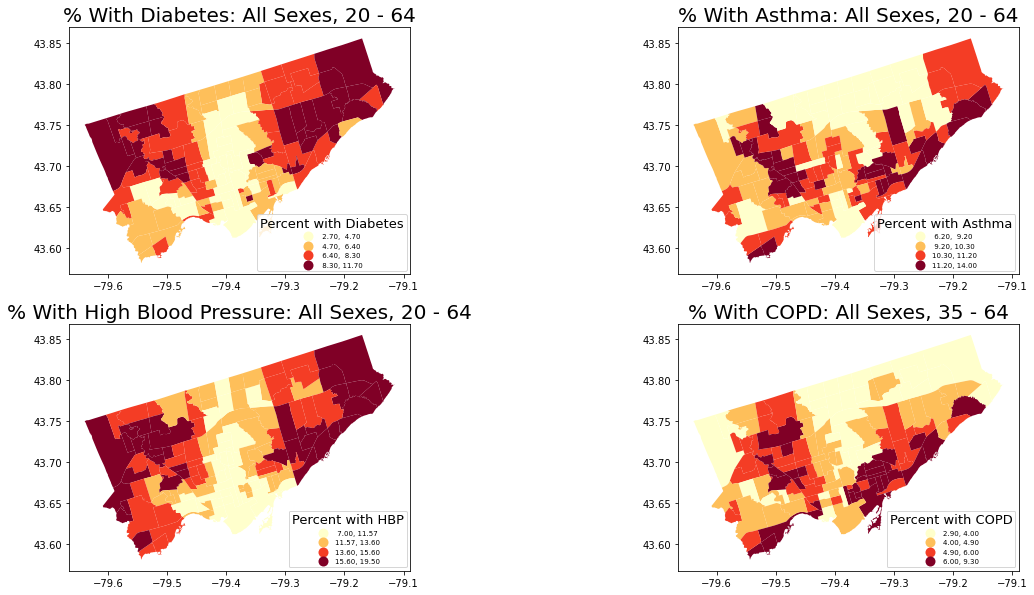

In [12]:
# Plotting all diseases (no correlation yet) by quantile classification
fig, axes = plt.subplots(2,2, figsize = (20, 10))

all_nbhd.plot(column='% With Diabetes: All Sexes, 20 - 64', scheme='quantiles', k=4, cmap='YlOrRd', legend=True, legend_kwds={'loc': 4, 'title': 'Percent with Diabetes', 'title_fontsize': 13,'fontsize': 7}, ax = axes[0][0])
all_nbhd.plot(column='% With Asthma: All Sexes, 20 - 64', scheme='quantiles', k=4, cmap='YlOrRd', legend=True, legend_kwds={'loc': 4, 'title': 'Percent with Asthma', 'title_fontsize': 13,'fontsize': 7}, ax = axes[0][1])
all_nbhd.plot(column='% With High Blood Pressure: All Sexes, 20 - 64', scheme='quantiles', k=4, cmap='YlOrRd', legend=True, legend_kwds={'loc': 4, 'title': 'Percent with HBP', 'title_fontsize': 13,'fontsize': 7},ax = axes[1][0])
all_nbhd.plot(column='% With COPD: All Sexes, 35 - 64', scheme='quantiles', k=4, cmap='YlOrRd', legend=True, legend_kwds={'loc': 4, 'title': 'Percent with COPD', 'title_fontsize': 13,'fontsize': 7}, ax = axes[1][1])

axes[0][0].set_title("% With Diabetes: All Sexes, 20 - 64", fontsize = 20)
axes[0][1].set_title("% With Asthma: All Sexes, 20 - 64", fontsize = 20)
axes[1][0].set_title("% With High Blood Pressure: All Sexes, 20 - 64", fontsize = 20)
axes[1][1].set_title("% With COPD: All Sexes, 35 - 64", fontsize = 20)

## Methods
- Two spatial clustering or autocorrelation tools: Global and local Moran’s I, incl. a queens weights matrix
- Ho: the values for each respective disease occurring are randomly distributed across the neighbourhoods studied
- Ha: the values for each respective disease occurring are not randomly distributed. 
    - If our p value is < 0.05 we will reject our null hypothesis.
- Ranking prevalence of diseases in neighbourhoods

### Data Analysis
Ho = the values of % disease are randomly distributed across our study area

Ha = the values of % disease are not randomly distributed and spatial clusters are present 

If our p value is < 0.05 we will reject our null hypothesis Ho

Text(0.5, 1.0, 'Queens Spatial Weights')

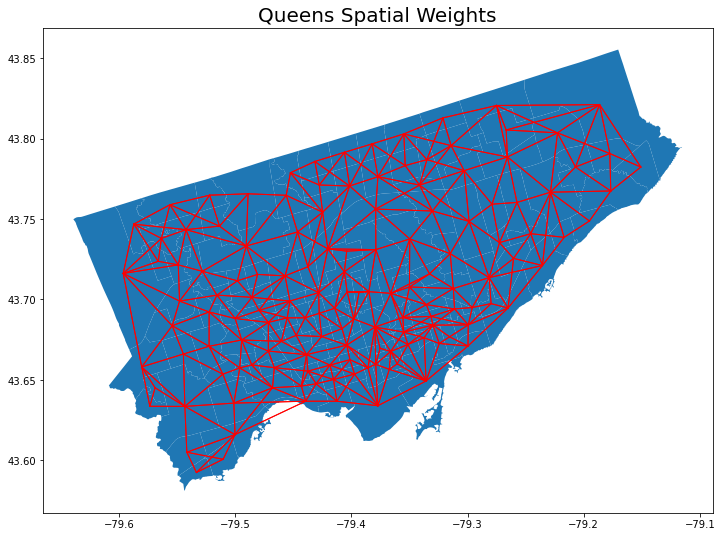

In [13]:
%%capture --no-display #yay
# Creating a weights matrix
nbhdcopy = all_nbhd.copy()

w = lps.weights.Queen.from_dataframe(nbhdcopy)
fig, axes = plt.subplots(1,1, figsize = (12,12))
nbhdcopy.plot(ax = axes)
w.plot(nbhdcopy, ax=axes, 
        edge_kws=dict(color='r', linewidth=1),
        node_kws=dict(marker=''))
axes.set_title("Queens Spatial Weights", fontsize = 20)

In [14]:
# Calculate averages of % diseases attribute of neighbours, and save in a new column
nbhdcopy['Weighted % With Diabetes: All Sexes, 20 - 64'] = lps.weights.lag_spatial(w, nbhdcopy['% With Diabetes: All Sexes, 20 - 64'])
nbhdcopy['Weighted % With Asthma: All Sexes, 20 - 64'] = lps.weights.lag_spatial(w, nbhdcopy['% With Asthma: All Sexes, 20 - 64'])
nbhdcopy['Weighted % With High Blood Pressure: All Sexes, 20 - 64'] = lps.weights.lag_spatial(w, all_nbhd['% With High Blood Pressure: All Sexes, 20 - 64'])
nbhdcopy['Weighted % With COPD: All Sexes, 35 - 64'] = lps.weights.lag_spatial(w, nbhdcopy['% With COPD: All Sexes, 35 - 64'])
nbhdcopy.head()

,Neighbourhood ID,geometry,Neighbourhood Name,% 19 to 65,"% Low income, 19 to 65","% Recent immigrants, 19 to 65","% With Diabetes: All Sexes, 20 - 64","% With Asthma: All Sexes, 20 - 64","% With High Blood Pressure: All Sexes, 20 - 64","% With COPD: All Sexes, 35 - 64","Weighted % With Diabetes: All Sexes, 20 - 64","Weighted % With Asthma: All Sexes, 20 - 64","Weighted % With High Blood Pressure: All Sexes, 20 - 64","Weighted % With COPD: All Sexes, 35 - 64"
0,1,"POLYGON ((-79.55236 43.70947, -79.55238 43.709...",West Humber-Clairville,61.9,7.6,7.6,9.6,10.2,16.7,3.6,58.0,72.9,111.0,33.8
1,2,"POLYGON ((-79.60338 43.75786, -79.60205 43.758...",Mount Olive-Silverstone-Jamestown,59.7,12.4,13.3,9.5,8.9,14.7,3.6,43.9,52.6,80.1,22.1
2,3,"POLYGON ((-79.57751 43.73384, -79.57806 43.734...",Thistletown-Beaumond Heights,58.0,8.2,5.6,8.0,10.0,15.9,3.9,54.2,63.1,95.2,27.7
3,4,"POLYGON ((-79.55512 43.71510, -79.55504 43.714...",Rexdale-Kipling,58.1,6.9,4.8,8.5,11.4,16.3,5.0,35.9,40.7,63.6,17.0
4,5,"POLYGON ((-79.55512 43.71510, -79.55569 43.716...",Elms-Old Rexdale,59.6,10.2,5.8,8.8,11.6,16.3,5.9,50.8,63.7,96.7,28.5


Text(0.5, 1.0, 'Unweighted vs Weighted % With COPD')

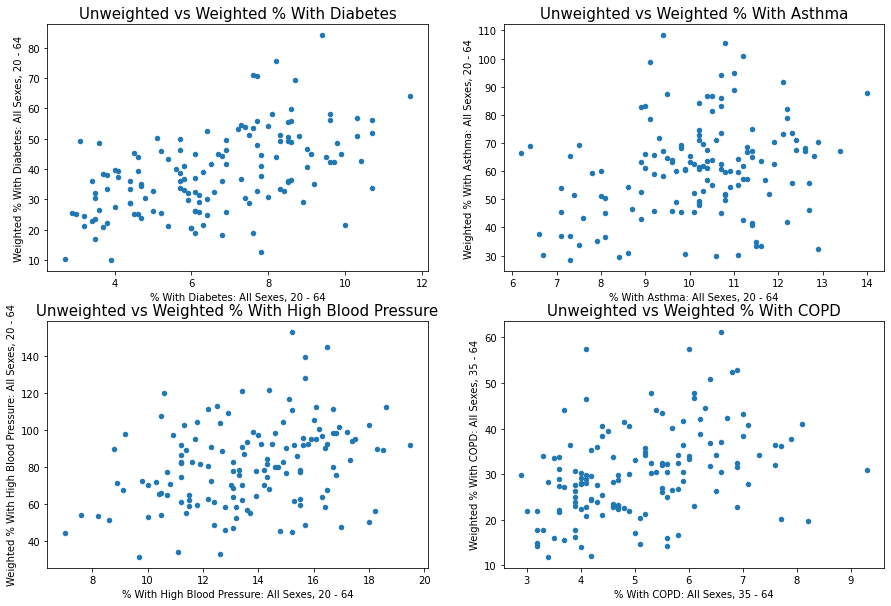

In [15]:
# Visualize averages and weighted diseases for their neighbours
fig, axes = plt.subplots(2,2, figsize = (15, 10))

nbhdcopy.plot.scatter(x = '% With Diabetes: All Sexes, 20 - 64', y = 'Weighted % With Diabetes: All Sexes, 20 - 64', ax = axes[0][0]) 
nbhdcopy.plot.scatter(x = '% With Asthma: All Sexes, 20 - 64', y = 'Weighted % With Asthma: All Sexes, 20 - 64', ax = axes[0][1])
nbhdcopy.plot.scatter(x = '% With High Blood Pressure: All Sexes, 20 - 64', y = 'Weighted % With High Blood Pressure: All Sexes, 20 - 64', ax = axes[1][0])
nbhdcopy.plot.scatter(x = '% With COPD: All Sexes, 35 - 64', y = 'Weighted % With COPD: All Sexes, 35 - 64', ax = axes[1][1])

axes[0][0].set_title("Unweighted vs Weighted % With Diabetes", fontsize = 15)
axes[0][1].set_title("Unweighted vs Weighted % With Asthma", fontsize = 15)
axes[1][0].set_title("Unweighted vs Weighted % With High Blood Pressure", fontsize = 15)
axes[1][1].set_title("Unweighted vs Weighted % With COPD", fontsize = 15)

## Results

The Morans I value of % With Diabetes:  0.7015728743966964
The p-value of this Morans I value is:  0.001
The Morans I value of % With Asthma:  0.5335795864264482
The p-value of this Morans I value is:  0.001
The Morans I value of % With High Blood Pressure:  0.7754732666534868
The p-value of this Morans I value is:  0.001
The Morans I value of % With COPD: 0.562306221596201
The p-value of this Morans I value is:  0.001


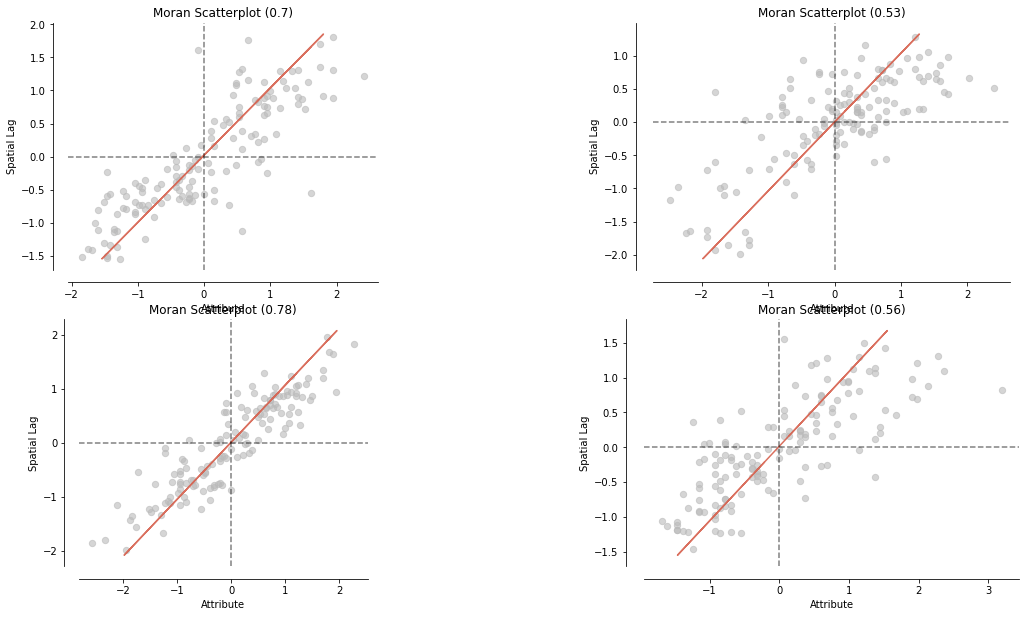

In [16]:
# Global Autocorrelation 
# Calculate Moran's I and visualize the plot
# Where I of 1 is perfectly clustered and -1 is perfectly 'dispersed'
from splot.esda import moran_scatterplot

fig, axes = plt.subplots(2,2, figsize = (20, 10))

diabetes_mi = esda.Moran(nbhdcopy['% With Diabetes: All Sexes, 20 - 64'], w)
print('The Morans I value of % With Diabetes: ', diabetes_mi.I)
print('The p-value of this Morans I value is: ', diabetes_mi.p_sim)
diabetes_moran = splot.esda.moran_scatterplot(diabetes_mi, ax = axes[0][0])

asthma_mi = esda.Moran(nbhdcopy['% With Asthma: All Sexes, 20 - 64'], w)
print('The Morans I value of % With Asthma: ', asthma_mi.I)
print('The p-value of this Morans I value is: ', asthma_mi.p_sim)
asthma_moran = splot.esda.moran_scatterplot(asthma_mi, ax = axes[0][1])

HBP_mi = esda.Moran(nbhdcopy['% With High Blood Pressure: All Sexes, 20 - 64'], w)
print('The Morans I value of % With High Blood Pressure: ', HBP_mi.I)
print('The p-value of this Morans I value is: ', HBP_mi.p_sim)
HBP_moran = splot.esda.moran_scatterplot(HBP_mi, ax = axes[1][0])

COPD_mi = esda.Moran(nbhdcopy['% With COPD: All Sexes, 35 - 64'], w)
print('The Morans I value of % With COPD:', COPD_mi.I)
print('The p-value of this Morans I value is: ', COPD_mi.p_sim)
COPD_moran = splot.esda.moran_scatterplot(COPD_mi, ax = axes[1][1])

Text(0.5, 1.0, 'Morans Global Scatterplot of % With COPD')

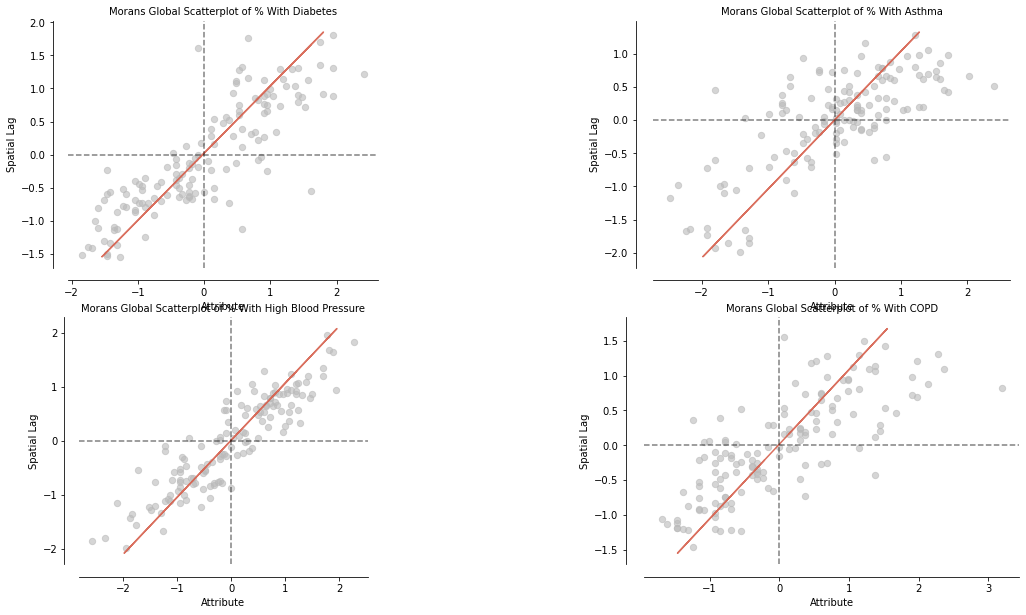

In [17]:
fig, axes = plt.subplots(2,2, figsize = (20, 10))

diabetes_moran = splot.esda.moran_scatterplot(diabetes_mi, ax = axes[0][0])
asthma_moran = splot.esda.moran_scatterplot(asthma_mi, ax = axes[0][1])
HBP_moran = splot.esda.moran_scatterplot(HBP_mi, ax = axes[1][0])
COPD_moran = splot.esda.moran_scatterplot(COPD_mi, ax = axes[1][1])

axes[0][0].set_title("Morans Global Scatterplot of % With Diabetes", fontsize = 10)
axes[0][1].set_title("Morans Global Scatterplot of % With Asthma", fontsize = 10)
axes[1][0].set_title("Morans Global Scatterplot of % With High Blood Pressure", fontsize = 10)
axes[1][1].set_title("Morans Global Scatterplot of % With COPD", fontsize = 10)

In [18]:
# Local Autocorrelation
# Identify which quadrant each neighbourhood is in, per disease
diabetes_lisa = esda.Moran_Local(all_nbhd['% With Diabetes: All Sexes, 20 - 64'], w)
asthma_lisa = esda.Moran_Local(all_nbhd['% With Asthma: All Sexes, 20 - 64'], w)
HBP_lisa = esda.Moran_Local(all_nbhd['% With High Blood Pressure: All Sexes, 20 - 64'], w)
COPD_lisa = esda.Moran_Local(all_nbhd['% With COPD: All Sexes, 35 - 64'], w)

# Break observations into significant or not
# Recall that if our p value is < 0.05 we will reject our null hypothesis Ho
nbhdcopy['Significant % With Diabetes'] = diabetes_lisa.p_sim < 0.05
nbhdcopy['Significant % With Asthma'] = asthma_lisa.p_sim < 0.05
nbhdcopy['Significant % With HBP'] = HBP_lisa.p_sim < 0.05
nbhdcopy['Significant % With COPD'] = COPD_lisa.p_sim < 0.05

# Store the quadrant they belong to
nbhdcopy['Quadrant % With Diabetes'] = diabetes_lisa.q
nbhdcopy['Quadrant % With Asthma'] = asthma_lisa.q
nbhdcopy['Quadrant % With HBP'] = HBP_lisa.q
nbhdcopy['Quadrant % With COPD'] = COPD_lisa.q

Text(0.5, 1.0, 'Local Quadrants of % With COPD')

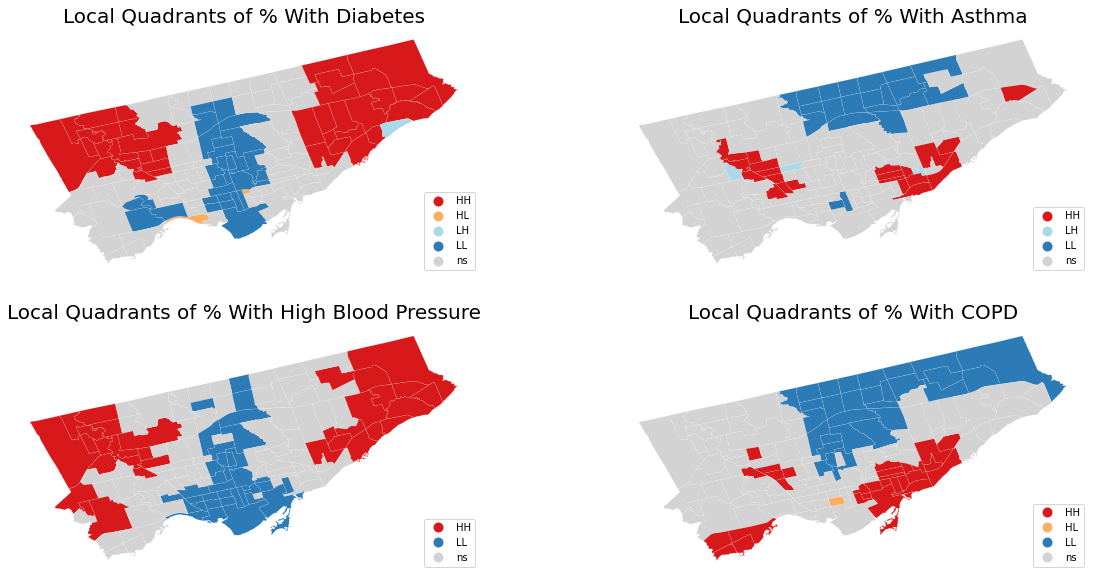

In [19]:
# Plot all quadrants
fig, axes = plt.subplots(2,2, figsize = (20, 10))

from splot.esda import lisa_cluster
splot.esda.lisa_cluster(diabetes_lisa, nbhdcopy, legend=True, legend_kwds={'loc': 4}, ax = axes[0][0])
splot.esda.lisa_cluster(asthma_lisa, nbhdcopy, legend=True, legend_kwds={'loc': 4}, ax = axes[0][1])
splot.esda.lisa_cluster(HBP_lisa, nbhdcopy, legend=True, legend_kwds={'loc': 4}, ax = axes[1][0])
splot.esda.lisa_cluster(COPD_lisa, nbhdcopy, legend=True, legend_kwds={'loc': 4}, ax = axes[1][1])

axes[0][0].set_title("Local Quadrants of % With Diabetes", fontsize = 20)
axes[0][1].set_title("Local Quadrants of % With Asthma", fontsize = 20)
axes[1][0].set_title("Local Quadrants of % With High Blood Pressure", fontsize = 20)
axes[1][1].set_title("Local Quadrants of % With COPD", fontsize = 20)

In [20]:
# Quadrant 1 is HH, high values in a nbhd are next to neighbours with high values
# Quadrant 2 is LH,  low values in a nbhd are next to neighbours with high values
# Quadrant 3 is LL, low values in a nbhd are next to neighbours with low values
# Quadrant 4 is HL, high values in a nbhd are next to neighbours with low values
nbhdcopy.head()

,Neighbourhood ID,geometry,Neighbourhood Name,% 19 to 65,"% Low income, 19 to 65","% Recent immigrants, 19 to 65","% With Diabetes: All Sexes, 20 - 64","% With Asthma: All Sexes, 20 - 64","% With High Blood Pressure: All Sexes, 20 - 64","% With COPD: All Sexes, 35 - 64","Weighted % With Diabetes: All Sexes, 20 - 64","Weighted % With Asthma: All Sexes, 20 - 64","Weighted % With High Blood Pressure: All Sexes, 20 - 64","Weighted % With COPD: All Sexes, 35 - 64",Significant % With Diabetes,Significant % With Asthma,Significant % With HBP,Significant % With COPD,Quadrant % With Diabetes,Quadrant % With Asthma,Quadrant % With HBP,Quadrant % With COPD
0,1,"POLYGON ((-79.55236 43.70947, -79.55238 43.709...",West Humber-Clairville,61.9,7.6,7.6,9.6,10.2,16.7,3.6,58.0,72.9,111.0,33.8,True,False,True,False,1,1,1,3
1,2,"POLYGON ((-79.60338 43.75786, -79.60205 43.758...",Mount Olive-Silverstone-Jamestown,59.7,12.4,13.3,9.5,8.9,14.7,3.6,43.9,52.6,80.1,22.1,True,False,True,False,1,2,1,3
2,3,"POLYGON ((-79.57751 43.73384, -79.57806 43.734...",Thistletown-Beaumond Heights,58.0,8.2,5.6,8.0,10.0,15.9,3.9,54.2,63.1,95.2,27.7,True,False,True,False,1,2,1,3
3,4,"POLYGON ((-79.55512 43.71510, -79.55504 43.714...",Rexdale-Kipling,58.1,6.9,4.8,8.5,11.4,16.3,5.0,35.9,40.7,63.6,17.0,True,False,True,False,1,1,1,3
4,5,"POLYGON ((-79.55512 43.71510, -79.55569 43.716...",Elms-Old Rexdale,59.6,10.2,5.8,8.8,11.6,16.3,5.9,50.8,63.7,96.7,28.5,True,False,True,False,1,1,1,4


In [21]:
#Function created containing boolean expressions, to easily rank each neighbourhood. 

def BooleanEval(num):
    mylist = []
    if (nbhdcopy.iloc[num][18] == 1) | (nbhdcopy.iloc[num][18] == 2): # Diabetes
        a = True 
        mylist.append(a)
    if (nbhdcopy.iloc[num][19] == 1) | (nbhdcopy.iloc[num][19] == 2): # Asthma
        b = True
        mylist.append(b)
    if (nbhdcopy.iloc[num][20] == 1) | (nbhdcopy.iloc[num][20] == 2): #HBP
        c = True
        mylist.append(c)
    if (nbhdcopy.iloc[num][21] == 1) | (nbhdcopy.iloc[num][21] == 2): #COPD
        d = True       
        mylist.append(d)
    return mylist

def SigEval(num):
    slist=[]
    if (nbhdcopy.iloc[num][14] == True):
        a = True 
        slist.append(a)
    if (nbhdcopy.iloc[num][15] == True):
        b = True
        slist.append(b)
    if (nbhdcopy.iloc[num][16] == True): 
        c = True
        slist.append(c)
    if (nbhdcopy.iloc[num][17] == True):
        d = True       
        slist.append(d)
    return slist 
         
    
nbhdcopy['Rankings'] = ""
listnum = list(range(0, 140))

for num in listnum:
    
    mylist = BooleanEval(num)
    slist = SigEval(num)
    #if all quadrants are either 1 or 2 thats a ranking of 4
    if ((mylist.count(True) == 4) & (slist.count(True)==4)): 
        nbhdcopy.at[num, "Rankings"] = 4    
        
    #if 3 of 4 quadrants are either 1 or 2 thats a ranking of 3
    elif ((mylist.count(True) == 3) & (slist.count(True)==4)): 
        nbhdcopy.at[num, "Rankings"] = 3
   
    #if 2 of 4 quadrants are either 1 or 2 thats a ranking of 2
    elif ((mylist.count(True) == 2) & (slist.count(True)==4)):
        nbhdcopy.at[num, "Rankings"] = 2
    
    #if 1 of 4 quadrants are either 1 or 2 thats a ranking of 1
    elif ((mylist.count(True) == 1) & (slist.count(True)==4)): 
        nbhdcopy.at[num, "Rankings"] = 1

    #if 0 of 4 quadrants are either 1 or 2 thats a ranking of 0
    elif ((mylist.count(True) == 0) & (slist.count(True)==4)): 
        nbhdcopy.at[num, "Rankings"] = 0
    
    else:
        nbhdcopy.at[num, "Rankings"] = None

In [22]:
# Remove rows with null values
nbhd_ranked = nbhdcopy.dropna(axis=0, subset=['Rankings'])
nbhd_ranked

,Neighbourhood ID,geometry,Neighbourhood Name,% 19 to 65,"% Low income, 19 to 65","% Recent immigrants, 19 to 65","% With Diabetes: All Sexes, 20 - 64","% With Asthma: All Sexes, 20 - 64","% With High Blood Pressure: All Sexes, 20 - 64","% With COPD: All Sexes, 35 - 64","Weighted % With Diabetes: All Sexes, 20 - 64","Weighted % With Asthma: All Sexes, 20 - 64","Weighted % With High Blood Pressure: All Sexes, 20 - 64","Weighted % With COPD: All Sexes, 35 - 64",Significant % With Diabetes,Significant % With Asthma,Significant % With HBP,Significant % With COPD,Quadrant % With Diabetes,Quadrant % With Asthma,Quadrant % With HBP,Quadrant % With COPD,Rankings
27,28,"POLYGON ((-79.50384 43.70288, -79.50425 43.704...",Rustic,52.4,13.0,3.9,9.0,11.7,16.7,5.6,40.7,57.0,80.0,30.4,True,True,True,True,1,1,1,1,4
36,37,"POLYGON ((-79.44043 43.76340, -79.44052 43.763...",Willowdale West,60.6,6.3,5.8,5.2,8.1,13.2,3.9,25.5,36.6,58.1,17.7,True,True,True,True,3,3,3,3,0
39,40,"POLYGON ((-79.34390 43.75650, -79.34705 43.755...",St. Andrew-Windfields,61.8,7.8,6.6,4.7,9.2,11.9,3.9,34.4,58.9,81.4,26.4,True,True,True,True,3,3,3,3,0
77,78,"POLYGON ((-79.40401 43.64719, -79.40419 43.647...",Kensington-Chinatown,69.4,19.0,9.3,4.7,8.6,8.6,5.6,23.8,54.2,51.2,24.9,True,True,True,True,3,3,3,4,0
114,115,"POLYGON ((-79.51329 43.69338, -79.51155 43.693...",Mount Dennis,61.6,14.4,7.0,8.5,12.1,15.6,6.4,50.7,73.2,95.5,36.8,True,True,True,True,1,1,1,1,4
119,120,"POLYGON ((-79.25428 43.71809, -79.25539 43.716...",Clairlea-Birchmount,62.0,9.1,7.9,8.2,11.2,16.5,6.0,75.5,100.9,144.5,57.5,True,True,True,True,1,1,1,1,4
123,124,"POLYGON ((-79.24549 43.73060, -79.24555 43.730...",Kennedy Park,62.2,13.9,7.0,10.4,11.3,17.3,6.4,42.6,57.1,83.6,31.7,True,True,True,True,1,1,1,1,4


Text(0.5, 1.0, 'Significant & Ranked Neighbourhoods with Diseases')

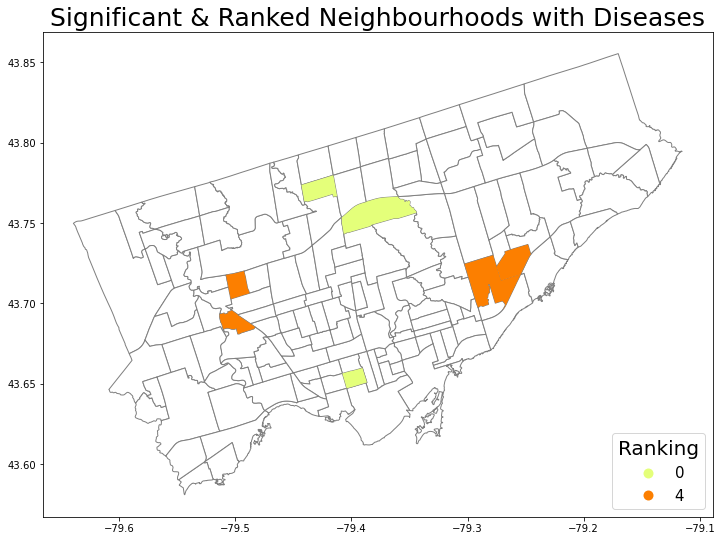

In [23]:
%%capture --no-display #yay
fig, axes = plt.subplots(1,1, figsize=(12, 12))

all_nbhd.plot(color='white', edgecolor='grey', ax=axes)
nbhd_ranked.plot(column='Rankings', cmap='Wistia', legend=True, legend_kwds={'loc': 4, 'title': 'Ranking', 'title_fontsize': 20,'fontsize': 15}, ax = axes)

axes.set_title("Significant & Ranked Neighbourhoods with Diseases", fontsize = 25)

## Conclusion 
*Do our four diseases (Diabetes, Asthma, High Blood Pressure, Chronic Obstructive Pulmonary Disease) have similar spatial patterns?* It depends based on global and or local spatial autocorrelation. 

When looking at the global spatial autocorrelation:
- P-values are smaller than the 0.05, we reject our null hypothesis  
- Global autocorrelation supports our alternative hypothesis 
- Diseases are spatially clustered

However, looking at local autocorrelation: 
- P-values were smaller than the 0.05 for 9 out of 140 neighbourhoods
- These neighbourhoods had diseases percents that were significant across all four diseases

In [24]:
nbhd_ranked.head()

,Neighbourhood ID,geometry,Neighbourhood Name,% 19 to 65,"% Low income, 19 to 65","% Recent immigrants, 19 to 65","% With Diabetes: All Sexes, 20 - 64","% With Asthma: All Sexes, 20 - 64","% With High Blood Pressure: All Sexes, 20 - 64","% With COPD: All Sexes, 35 - 64","Weighted % With Diabetes: All Sexes, 20 - 64","Weighted % With Asthma: All Sexes, 20 - 64","Weighted % With High Blood Pressure: All Sexes, 20 - 64","Weighted % With COPD: All Sexes, 35 - 64",Significant % With Diabetes,Significant % With Asthma,Significant % With HBP,Significant % With COPD,Quadrant % With Diabetes,Quadrant % With Asthma,Quadrant % With HBP,Quadrant % With COPD,Rankings
27,28,"POLYGON ((-79.50384 43.70288, -79.50425 43.704...",Rustic,52.4,13.0,3.9,9.0,11.7,16.7,5.6,40.7,57.0,80.0,30.4,True,True,True,True,1,1,1,1,4
36,37,"POLYGON ((-79.44043 43.76340, -79.44052 43.763...",Willowdale West,60.6,6.3,5.8,5.2,8.1,13.2,3.9,25.5,36.6,58.1,17.7,True,True,True,True,3,3,3,3,0
39,40,"POLYGON ((-79.34390 43.75650, -79.34705 43.755...",St. Andrew-Windfields,61.8,7.8,6.6,4.7,9.2,11.9,3.9,34.4,58.9,81.4,26.4,True,True,True,True,3,3,3,3,0
77,78,"POLYGON ((-79.40401 43.64719, -79.40419 43.647...",Kensington-Chinatown,69.4,19.0,9.3,4.7,8.6,8.6,5.6,23.8,54.2,51.2,24.9,True,True,True,True,3,3,3,4,0
114,115,"POLYGON ((-79.51329 43.69338, -79.51155 43.693...",Mount Dennis,61.6,14.4,7.0,8.5,12.1,15.6,6.4,50.7,73.2,95.5,36.8,True,True,True,True,1,1,1,1,4


- General pattern of correlation according to global spatial autocorrelation, but not local

### Limitations
- Sociodemographic variables not included

### Thank you!